<a href="https://colab.research.google.com/github/Aashiff2003/DSGP-group-25/blob/Geethmi/Sample_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets -q

In [ ]:
#import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: geethmirajapakshe
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data


100%|██████████| 991M/991M [00:45<00:00, 22.8MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (180,180)

In [ ]:
train_data_dir = "/content/dog-vs-cat-images-data/dogcat/train"
test_data_dir = "/content/dog-vs-cat-images-data/dogcat/test1"
validation_dir = "/content/dog-vs-cat-images-data/dogcat/validation"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)


validation_data = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE)


test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE)


Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.
Found 12500 files belonging to 1 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch, lable_batch in train_data.take(1):
  print(image_batch.shape)
  print(lable_batch.shape)

(32, 180, 180, 3)
(32,)


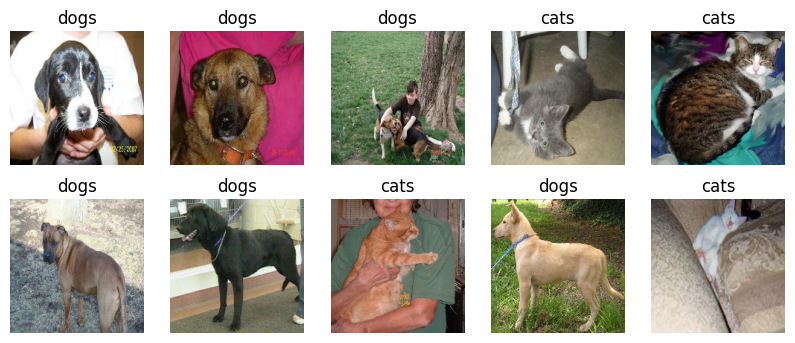

In [ ]:
#plot data sample
plt.figure(figsize=(10,4))
for image,lable in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[lable[i]])
    plt.axis('off')

In [ ]:
# feature scaling
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
# Using ResNet50 pre trained model

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  weights='imagenet',
                                                  input_shape=(180,180,3),
                                                  classes=2,
                                                  pooling='max')

for layer in pretrained_model.layers:
  layer.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Model building

model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.build((None, 180, 180, 3))


In [ ]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,860,353 (91.02 MB)

 Trainable params: 272,641 (1.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, epochs=50, validation_data=validation_data)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 99ms/step - accuracy: 0.5278 - loss: 0.7184 - val_accuracy: 0.6133 - val_loss: 0.6625
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.5663 - loss: 0.6802 - val_accuracy: 0.6309 - val_loss: 0.6500
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.5986 - loss: 0.6636 - val_accuracy: 0.6344 - val_loss: 0.6410
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6085 - loss: 0.6559 - val_accuracy: 0.6290 - val_loss: 0.6446
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6193 - loss: 0.6489 - val_accuracy: 0.6439 - val_loss: 0.6328
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6227 - loss: 0.6466 - val_accuracy: 0.6212 - val_loss: 0.6401
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.6263 - loss: 0.6469 - val_accuracy: 0.6702 - val_loss: 0.6183
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.6348 - loss: 0.6385 - 

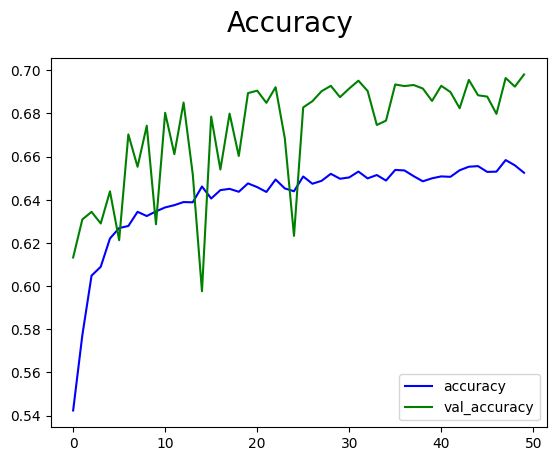

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

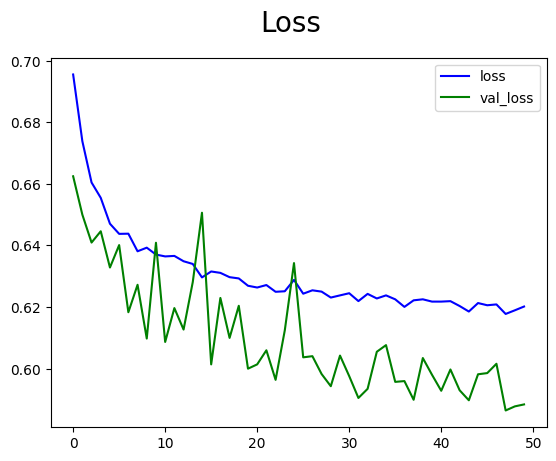

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━

In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.50584>

In [ ]:
import cv2

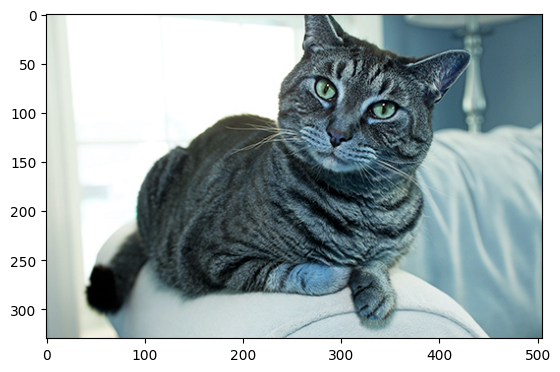

In [ ]:
image = cv2.imread("/content/cat.jpg")
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
# Prediction
y_hat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
y_hat

array([[0.6843648]], dtype=float32)

In [ ]:
class_names

['cats', 'dogs']

In [ ]:
if(y_hat>=0.5):
  print(class_names[1])
else:
  print(class_names[0])

dogs
